<a href="https://colab.research.google.com/github/abuazlan19121/Airbnb-capstone-project/blob/main/AirBnb_2019_New_York_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -
**AirBnb Bookings Analysis Exploratory Data **


##### **Project Type**    - EDA
##### **Contribution**    - Individual:- Abu Azlan Nadaf


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Dataset Loading

In [3]:
# Load Dataset
df = pd.read_csv('/content/Airbnb NYC 2019.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(48895, 16)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

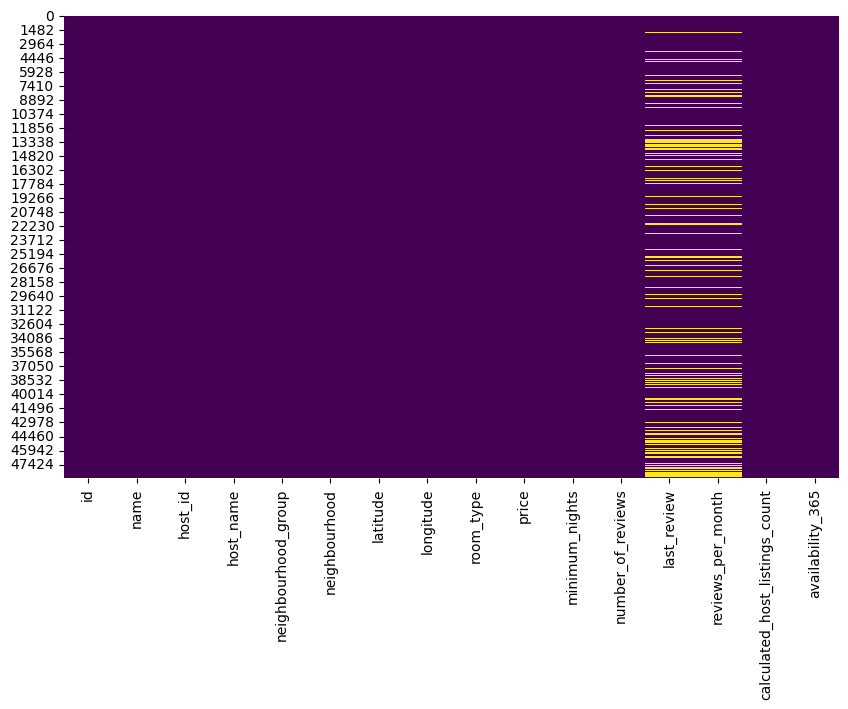

In [9]:
# Visualizing the missing values

# Checking Null Value by plotting Heatmap

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cmap='viridis',cbar=False)
plt.show()

# Missing values will be represented as yellow lines.

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

### Variables Description

Answer Here

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.

# This code is used to identify and select the categorical columns in the dataset
cat_col = df.select_dtypes(include = 'object').columns
print(cat_col)

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')


In [14]:
# This code is used to identify and select the numerical columns in the dataset
num_col = df.select_dtypes(exclude = 'object').columns
print(num_col)

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


In [4]:
# This code removes rows from the df where either the 'name' or 'host_name' column has a missing value.

df = df.dropna(subset=['name', 'host_name'])

In [5]:
# This line replaces missing values (NaN) in the 'reviews_per_month' column with the value 0.

df.fillna({'reviews_per_month' : 0 },inplace = True)

In [6]:
# This line drops the 'last_review' column from the dataset.

df = df.drop(['last_review'], axis = 1) # the last_review column is necessary for analysis

In [7]:
# identifying rows where both the 'price' and 'availability_365' columns have a value of 0.

df[(df['price']==0 ) & (df['availability_365']==0)]

id                                             name   host_id  \
25634  20523843  MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)  15787004   
25753  20608117                  Sunny, Quiet Room in Greenpoint   1641537   
26259  20933849                            the best you can find  13709292   

          host_name neighbourhood_group neighbourhood  latitude  longitude  \
25634  Martial Loft            Brooklyn      Bushwick  40.69467  -73.92433   
25753        Lauren            Brooklyn    Greenpoint  40.72462  -73.94072   
26259        Qiuchi           Manhattan   Murray Hill  40.75091  -73.97597   

             room_type  price  minimum_nights  number_of_reviews  \
25634     Private room      0               2                 16   
25753     Private room      0               2                 12   
26259  Entire home/apt      0               3                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  
25634               0.71                               5                 0  
25753               0.53                               2                 0  
26259               0.00                               1                 0

In [8]:
# This code removes rows from the df where the 'price' and 'availability_365' columns have a value of 0.

df = df[~((df['price'] == 0) & (df['availability_365'] == 0))]

<Axes: ylabel='price'>

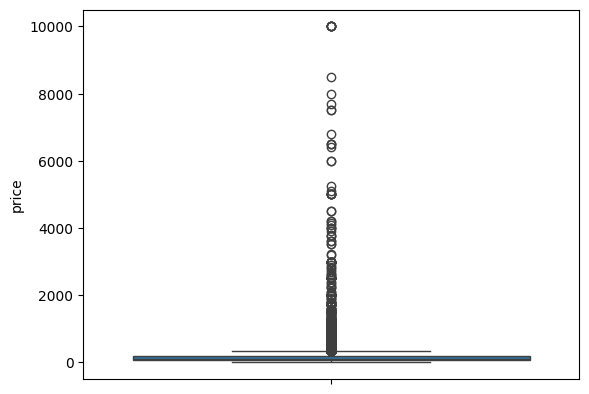

In [20]:
# this code creates a boxplot visualization to analyze the distribution of prices

sns.boxplot(df['price'])

In [9]:
# This code provid a good analysis to find the top 10 most expensive neighborhoods based on average price

top_avg_prices_by_neighbourhood = df.groupby('neighbourhood').agg({'price': 'mean'}).sort_values('price').reset_index()
top_avg_prices_by_neighbourhood.sort_values('price', ascending=False).head(10)

neighbourhood       price
220     Fort Wadsworth  800.000000
219            Woodrow  700.000000
218            Tribeca  490.638418
217           Sea Gate  487.857143
216          Riverdale  442.090909
215       Prince's Bay  409.500000
214  Battery Park City  367.086957
213  Flatiron District  341.925000
212      Randall Manor  336.000000
211               NoHo  295.717949

In [10]:
# calculates the average price for each neighborhood group and ranks them based on those averages

top_avg_prices_by_neighbourhood_group = df.groupby('neighbourhood_group').agg({'price': 'mean'}).sort_values('price').reset_index()
top_avg_prices_by_neighbourhood_group.sort_values('price', ascending=False)

neighbourhood_group       price
4           Manhattan  196.906571
3            Brooklyn  124.422910
2       Staten Island  114.812332
1              Queens   99.536017
0               Bronx   87.469238

In [11]:
# calculates the total price per combination of neighborhood group and room type

df_n_roomtype = df.groupby(['neighbourhood_group','room_type']).agg({'price': 'sum'})
df_n_roomtype.sort_values('price', ascending=False)

price
neighbourhood_group room_type               
Manhattan           Entire home/apt  3287452
Brooklyn            Entire home/apt  1703898
Manhattan           Private room      931291
Brooklyn            Private room      774517
Queens              Entire home/apt   308218
                    Private room      241888
Bronx               Entire home/apt    48250
                    Private room       43546
Manhattan           Shared room        42709
Staten Island       Entire home/apt    30597
Brooklyn            Shared room        20868
Queens              Shared room        13666
Staten Island       Private room       11711
Bronx               Shared room         3458
Staten Island       Shared room          517

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

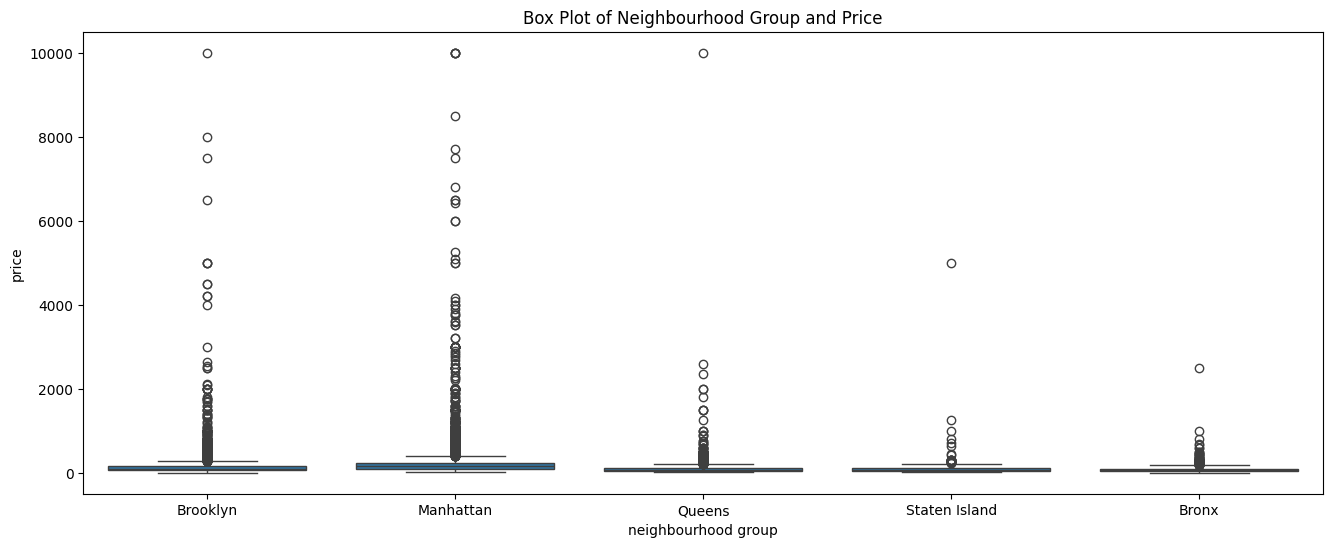

In [24]:
# Chart - 1 visualization code

plt.figure(figsize=(16, 6))
sns.boxplot(x="neighbourhood_group", y="price", data=df)
plt.xlabel("neighbourhood group")
plt.ylabel("price")
plt.title('Box Plot of Neighbourhood Group and Price')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

**The boxplot helps you visualize the spread of prices within each neighborhood group. You can see if prices are clustered around a central value or if there's a wide range within each group.**

##### 2. What is/are the insight(s) found from the chart?

Answer Here

**Manhattan has a higher median price compared to other neighbourhoods, indicating it is generally more expensive**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

T**he other neighbourhoods, like Brooklyn, Queens, and Bronx, have lower median prices and fewer outliers, suggesting more uniform and affordable pricing.**

#### Chart - 2

<ipython-input-25-fea903e300bc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="neighbourhood", y="price", data=df.nlargest(10,['price']),palette='mako')


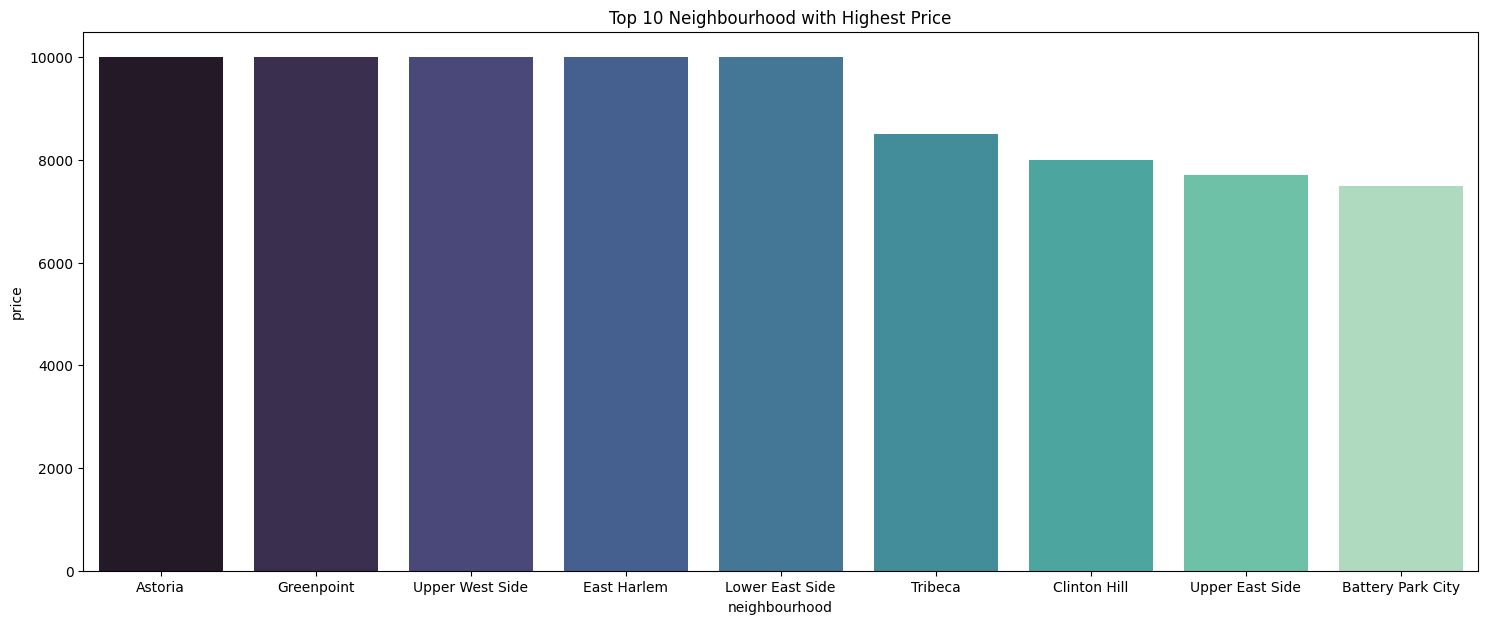

In [25]:
# Chart - 2 visualization code
plt.figure(figsize =(18,7))
sns.barplot(x="neighbourhood", y="price", data=df.nlargest(10,['price']),palette='mako')
plt.xlabel("neighbourhood")
plt.ylabel("price")
plt.title('Top 10 Neighbourhood with Highest Price')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

**We choose Bar chart for visualization for discrete categories (neighborhoods in this case) and their corresponding values (price)**

##### 2. What is/are the insight(s) found from the chart?

Answer Here

**Astoria,Greenpoint,Upper west side,east harium and lower east side has highest price as compared to other in top ten listing **

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

**Investors can identify potential areas for investment based on pricing trends and Businesses can better understand customer demographics and preferences.**

#### Chart - 3

<ipython-input-26-ade99ab0ef93>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_avg_prices_by_neighbourhood.head(20),x='neighbourhood',y='price',palette='mako')


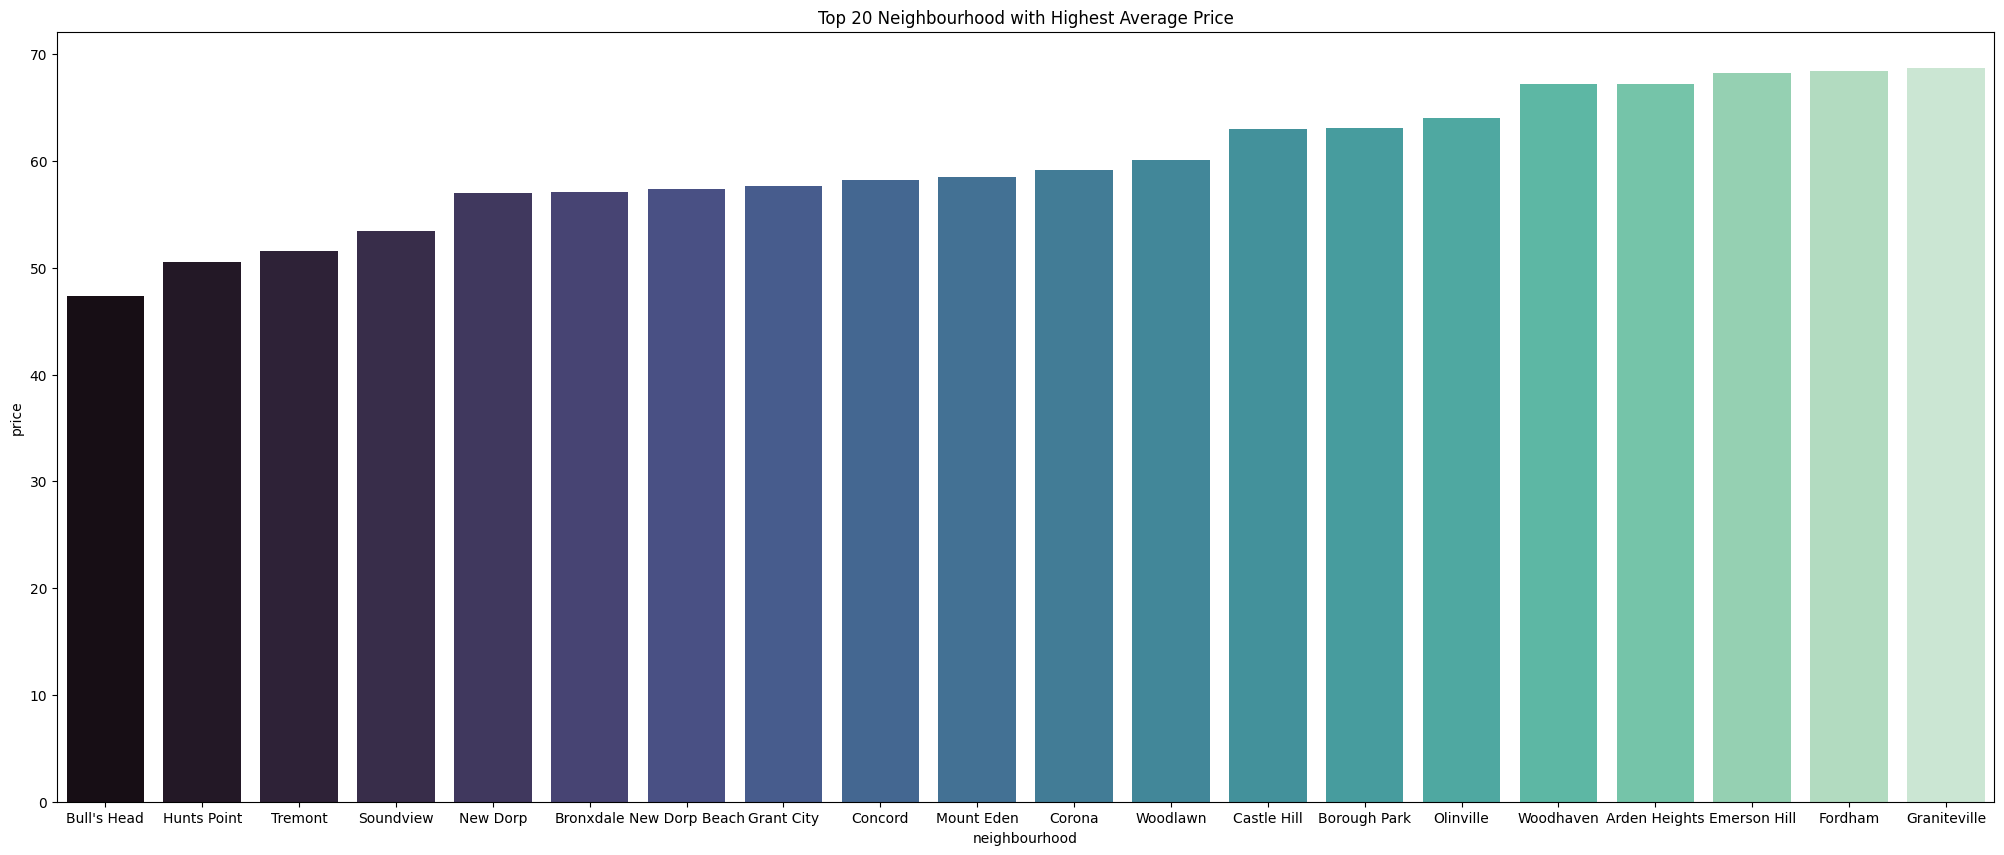

In [26]:
# Chart - 3 visualization code
plt.figure(figsize=(25,10))
sns.barplot(top_avg_prices_by_neighbourhood.head(20),x='neighbourhood',y='price',palette='mako')
plt.xlabel("neighbourhood")
plt.ylabel("price")
plt.title('Top 20 Neighbourhood with Highest Average Price')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

The Bar chart displays the top 10 neighborhoods based on their average price.
Price Comparison: It allows easy comparison of average prices across neighborhoods.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

**The neighborhoods with the highest average prices are Grantville, Emersom Hill Fordham, and Mount Eden.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

**Bull’s Head has the lowest average price.That is why this chart succinctly highlights the costliest and most affordable neighborhoods, aiding decision-making and property investment considerations.**

#### Chart - 4

<ipython-input-28-960223838561>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_avg_prices_by_neighbourhood_group,x='neighbourhood_group',y='price',palette='mako')


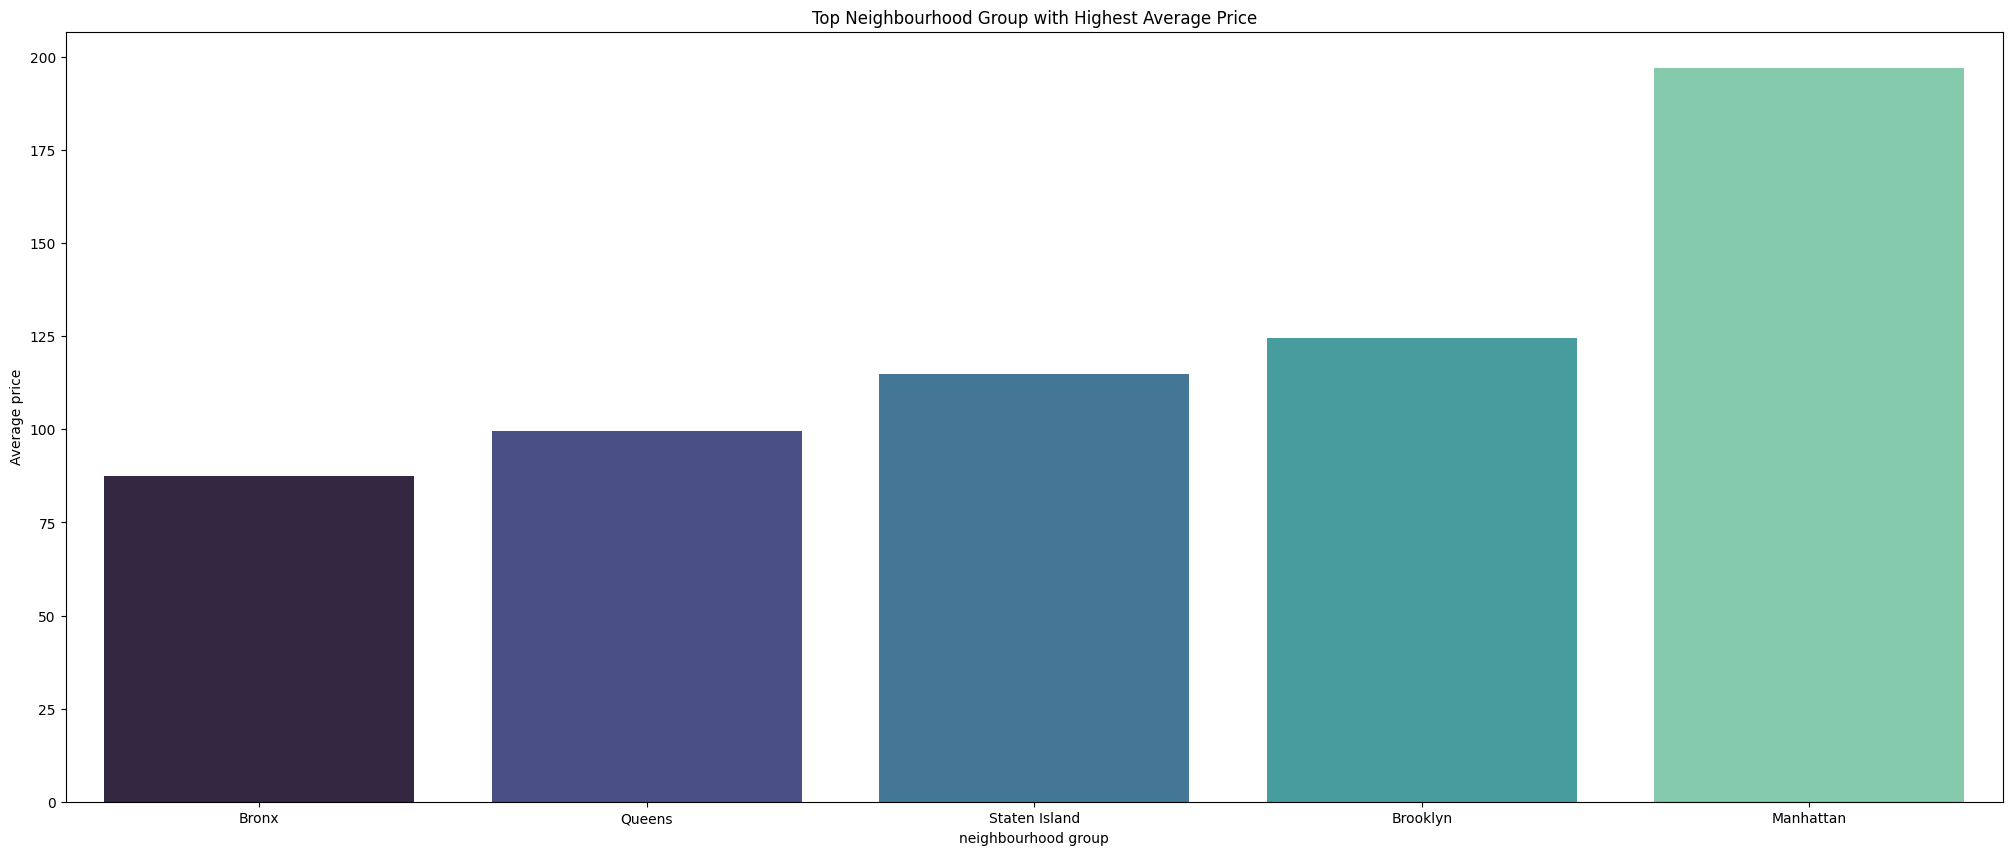

In [28]:
# Chart - 4 visualization code
plt.figure(figsize=(25,10))
sns.barplot(top_avg_prices_by_neighbourhood_group,x='neighbourhood_group',y='price',palette='mako')
plt.xlabel("neighbourhood group")
plt.ylabel("Average price")
plt.title('Top Neighbourhood Group with Highest Average Price')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

The Bar chart displays the top  neighborhoods Group based on their average price.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Manhattan stands out with the highest average price, nearly reaching 200. This suggests that real estate in Manhattan is significantly more expensive than in other boroughs.Brooklyn follows Manhattan, with an average price around 125. It is a popular choice for residents seeking a balance between city life and more space.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Staten Island has an average price of approximately 100. It offers a more affordable option compared to Manhattan and Brooklyn.
Queens has an average price of about 75, while the Bronx has the lowest average price at around 50. These boroughs provide more budget-friendly housing options. this Bar chart chart highlights the varying real estate prices across different neighborhood groups in New York City, providing valuable insights for homebuyers and investors.



#### Chart - 5

<ipython-input-29-16632f80b523>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x='neighbourhood_group',   # count each unique value in column


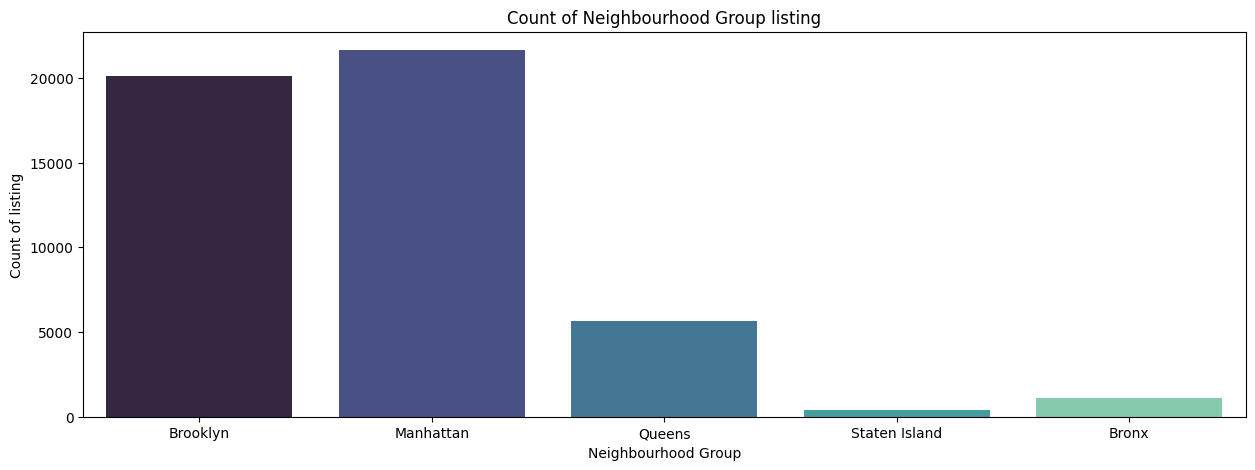

In [29]:
# Chart - 5 visualization code
plt.figure(figsize=(15, 5))
sns.countplot(df,x='neighbourhood_group',   # count each unique value in column
                       palette='mako')
plt.xlabel("Neighbourhood Group")
plt.ylabel("Count of listing")
plt.title('Count of Neighbourhood Group listing')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

This Bar chart was chosen for its effectiveness in visually conveying the distribution of neighborhood groups based on their count

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Brooklyn and Manhattan have significantly higher counts of listings compared to the other boroughs (Queens, Staten Island, and the Bronx).
This suggests that Brooklyn and Manhattan are the most popular areas for real estate listings in New York City

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Focusing on neighborhoods with high demand (e.g., Brooklyn and Manhattan) for property development.
Identifying areas with growth potential (e.g., Queens) for future investments.Revitalization efforts in Staten Island and the Bronx could yield positive returns.

#### Chart - 6

<ipython-input-30-344c9b736d6d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room_type', data=df, palette='mako')


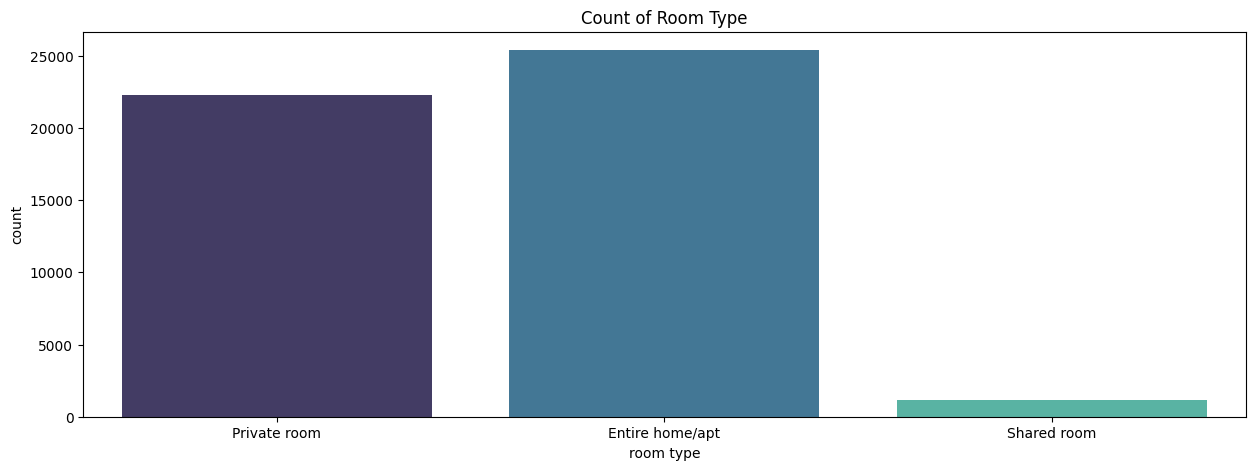

In [30]:
plt.figure(figsize=(15, 5))
sns.countplot(x='room_type', data=df, palette='mako')
plt.xlabel("room type")
plt.ylabel("count")
plt.title('Count of Room Type')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

The chart displays the distribution of different types of rooms available for rent.
Three room types are represented: Private room, Entire home/apt (apartment), and Shared room.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The high count for Entire Home/Apt suggests that guests prefer having an entire space to themselves.
Private rooms are also popular, offering a balance between privacy and affordability.
Shared rooms cater to budget-conscious travelers or those seeking a communal experience.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Real estate hosts can tailor their listings based on room type preferences.
Investors can focus on acquiring entire homes/apartments or renovating properties for private rooms.

#### Chart - 7

<ipython-input-31-6c199fa5a413>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df,x='room_type',y='price',palette='mako')


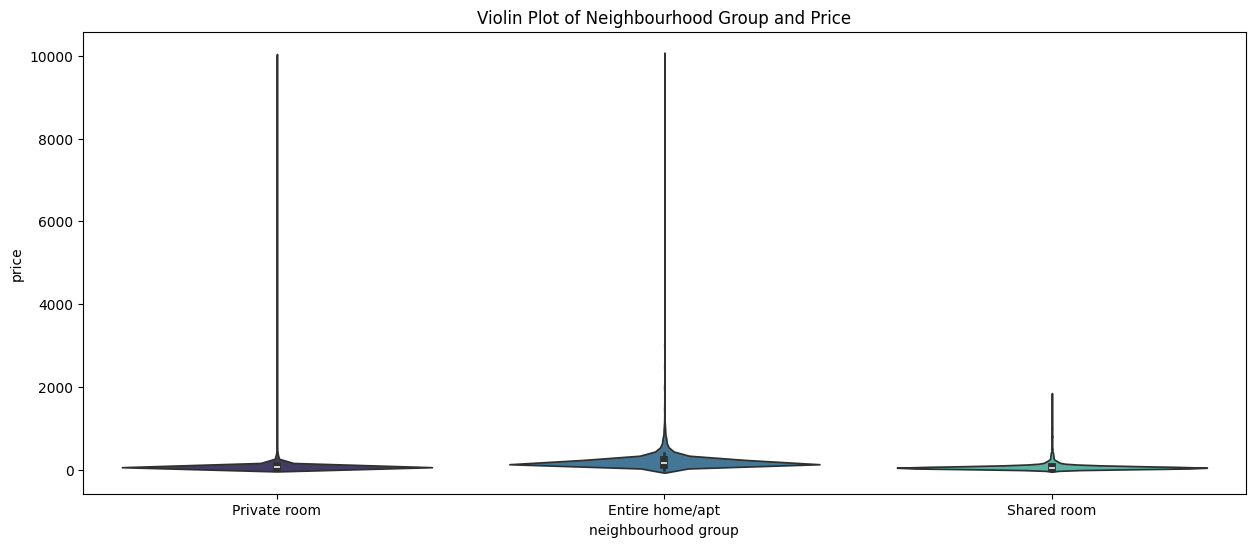

In [31]:
# Chart - 7 visualization code
plt.figure(figsize=(15,6))
sns.violinplot(df,x='room_type',y='price',palette='mako')
plt.xlabel("neighbourhood group")
plt.ylabel("price")
plt.title('Violin Plot of Neighbourhood Group and Price')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

 Violin plots effectively show the distribution of a numerical variable (price) for each category (room type) in this case. The wider the violin shape at a particular price range indicates a higher density of listings at that price point for that room type

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Most private rooms have prices concentrated in the lower range.
This suggests that private rooms are generally more affordable.
The widest violin represents entire homes or apartments.
The distribution is broader, indicating a wider range of prices.Shared rooms have prices similar to private rooms, with a concentration in the lower range.
Fewer shared rooms have higher prices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Hosts can adjust pricing strategies based on room type.
Marketing efforts can highlight affordability for private and shared rooms.

#### Chart - 8

In [41]:
# check and count room availability
df['availability_365'].value_counts()
# we find that more than 17,000 rooms and all are not available

availability_365
0      17505
365     1294
364      491
1        408
89       361
       ...  
195       26
183       24
196       24
181       23
202       20
Name: count, Length: 366, dtype: int64

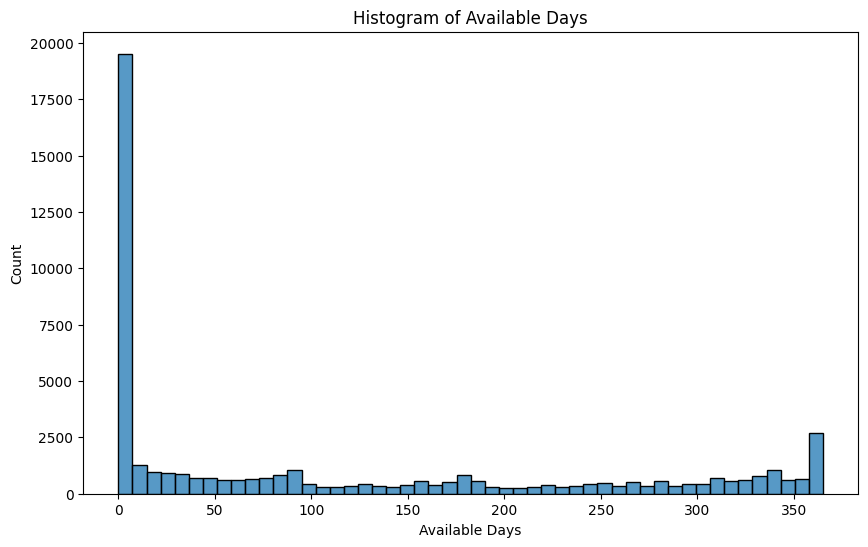

In [40]:
# Chart - 8 visualization code
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='availability_365', bins=50)
plt.title('Histogram of Available Days')
plt.xlabel('Available Days')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

A histogram chart is designed to visualize the distribution of continuous variables. In our case, 'availability_365' is a continuous numerical variable representing the number of days a listing is available throughout the year.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

There is a significant spike at zero available days, indicating that a large number of data points have no available days.
Other Available Days or the rest of the data is relatively evenly distributed with smaller counts. However, there is another noticeable but smaller spike around 350 available days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here


Some listings might be rentals available only during specific seasons or holidays. Owners might block out the rest of the year as unavailable.
and maybe these listings could be temporarily unavailable due to renovations, personal use by the owner, or being taken off the market. So owner must  consider during decision making when should they increase availability for people

#### Chart - 9

In [53]:
# check how many minimum nights are above 365 days
df[df['minimum_nights']>365].value_counts().sum()

13

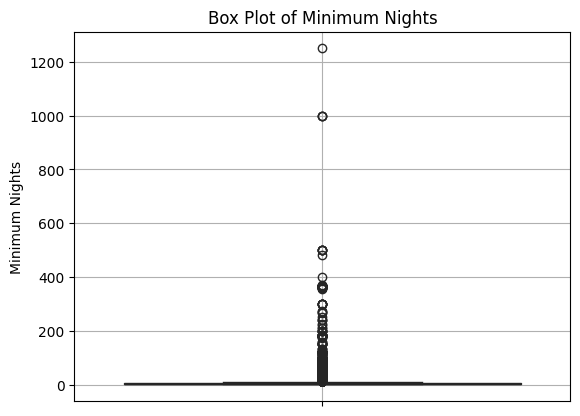

In [62]:
# we can use box plot to see those values which are above 365 days

sns.boxplot(y=df['minimum_nights'], color='green')
plt.title('Box Plot of Minimum Nights')
plt.ylabel('Minimum Nights')
plt.grid(True)
plt.show()

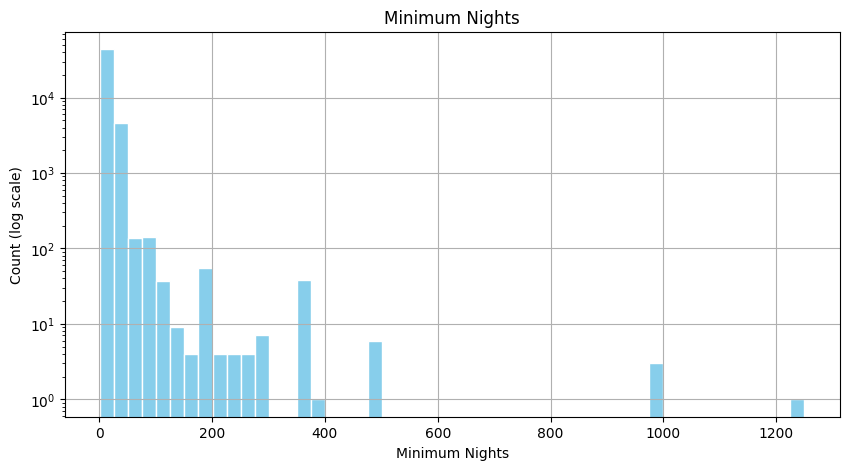

In [59]:
# Chart - 9 visualization code
minimum_nights = df['minimum_nights']
plt.figure(figsize=(10, 5))
plt.hist(minimum_nights, bins=50, color='skyblue', edgecolor='white')  # Customize colors
plt.title('Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Count (log scale)')
plt.yscale('log')                          # Apply logarithmic scale to the y-axis
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

The histogram effectively shows how many listings have different minimum night stay requirements. It reveals which ranges of minimum nights are most common and how many listings fall into those ranges.The log scale is applied to the y-axis (count) because there might be a significant variation in the number of listings with different minimum night requirements. A log scale compresses large values, allowing you to see the distribution across different ranges more effectively.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The histogram seems to show a peak at lower minimum night values (possibly around 1-2 nights), indicating a higher concentration of listings with shorter minimum stays.The distribution appears to have a tail towards the higher end (more nights), signifying that some listings do allow longer stays. This caters to different guest needs and preferences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

 The distribution of minimum nights can influence booking strategy. If shorter stays are dominant, they might focus on optimizing pricing and availability for weekend getaways or short business trips.

#### Chart - 10

In [64]:
# Chart - 10 visualization code
# Create the interactive map using Plotly Express
fig = px.scatter_mapbox(df,
                        lat='latitude', lon='longitude',  # Set latitude and longitude columns
                        hover_name='name',                  # Display listing name on hover
                        hover_data=['price', 'room_type', 'availability_365'],  # Show additional data on hover
                        color='room_type',                   # Color points based on room type
                        color_discrete_map={'Entire home/apt': 'blue', 'Private room': 'green', 'Shared room': 'red'},  # Set color scheme for room types
                        zoom=10,                             # Set initial zoom level
                        height=600)                          # Set map height

# Customize the map layout
fig.update_layout(mapbox_style='open-street-map',  # Set map style (e.g., open-street-map)
                  title='Interactive Map of Airbnb Listings',  # Add a title
                  margin=dict(r=10, t=40, b=10, l=10)  # Adjust margins for better layout
                 )

# Display the interactive map
fig.show()



##### 1. Why did you pick the specific chart?

Answer Here.

The scatter map allows yusou to see how listings are geographically distributed across a specific area. This can reveal patterns related to location and listing types.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

By using this geographicaly distributed map, we can clearly see private room and entire home/apt are dominated and this shows the geopraphical importance of location such as beach side and business areas

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

You can see if there are areas with a higher density of listings or if certain room types dominate specific neighborhoods. This can inform pricing strategies and identify potential gaps in the market.The map can help others to understand if there are location-based preferences for different room types. For example, you might see a higher concentration of private room listings near beaches, catering to solo travelers seeking affordable options.

#### Chart - 11

<ipython-input-65-5e6493db728a>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




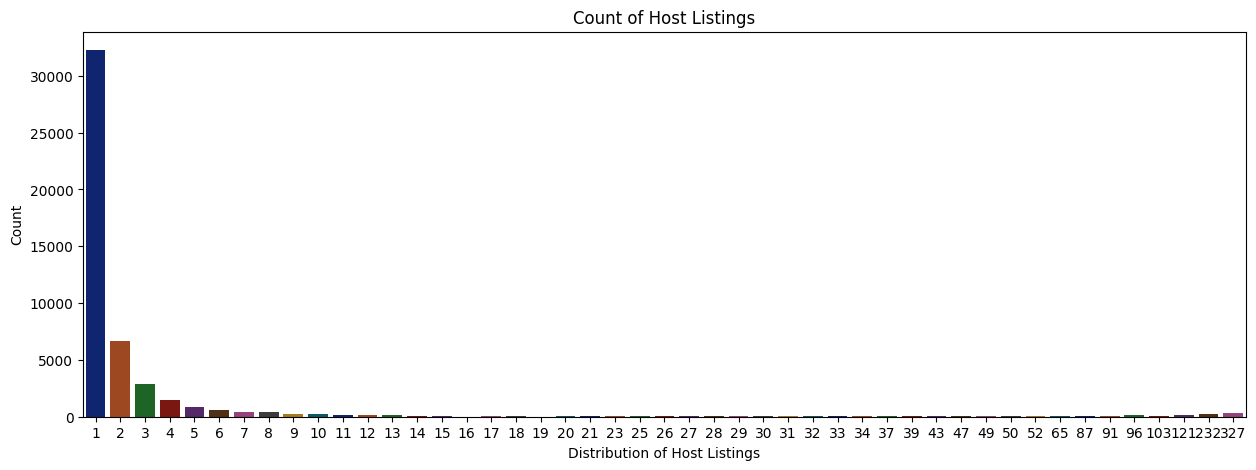

In [65]:
# Chart - 11 visualization code

plt.figure(figsize=(15,5))
sns.countplot(df,x='calculated_host_listings_count',palette='dark')
plt.xlabel('Distribution of Host Listings')
plt.ylabel('Count')
plt.title('Count of Host Listings')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

A count plot visually represents the distribution of values in a categorical column.(e.g calculated_host_listings_count )

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The most common scenario is that hosts have only one listing. This is evident from the tall blue bar at the “1” mark on the x-axis, representing over 30,000 hosts.Beyond one listing, the number of hosts decreases significantly. There are smaller bars for 2 to 4 listings per host .This data suggests that the majority of hosts on the platform have only one listing, while a smaller subset manages a handful of listings.The histogram shows a sparse distribution of hosts with multiple listings. Most hosts prefer to manage a single listing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Count plots reveal patterns and trends within categorical variables.
Businesses can use these insights to make informed decisions, optimize processes, and allocate resources effectively.

#### Chart - 12

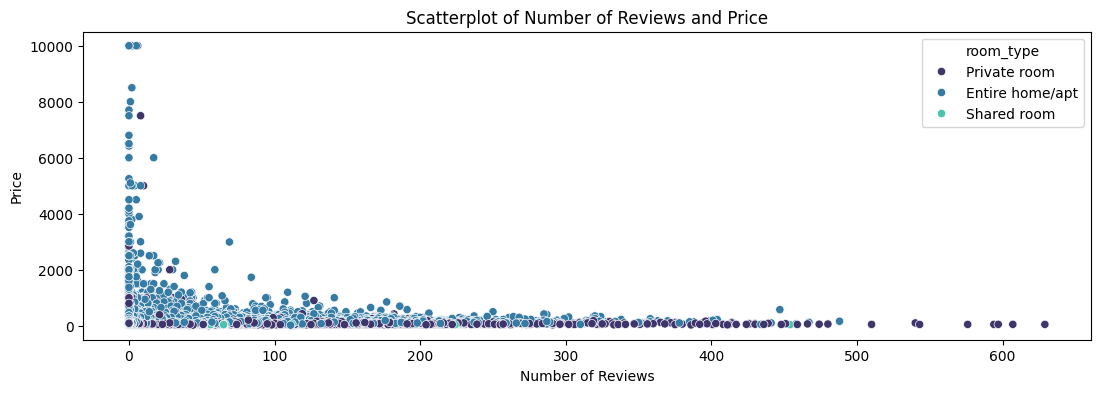

In [76]:
# Chart - 12 visualization code

plt.figure(figsize=(13,4))
sns.scatterplot(df,x='number_of_reviews',y='price',palette='mako',hue='room_type')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Scatterplot of Number of Reviews and Price')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

The scatterplot allows you to see if there's a general trend between reviews and price. For example, you might see a pattern where listings with a higher number of reviews tend to have higher prices, suggesting a potential correlation.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Most data points are clustered towards the lower end of both axes.
Private rooms dominate the lower price range, with varying numbers of reviews.
There are significantly fewer hosts with more than one listing (higher prices).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Hosts can use this information to optimize their pricing strategy based on the number of reviews. Understanding the relationship between price and reviews helps hosts cater to customer preferences.

#### Chart - 13

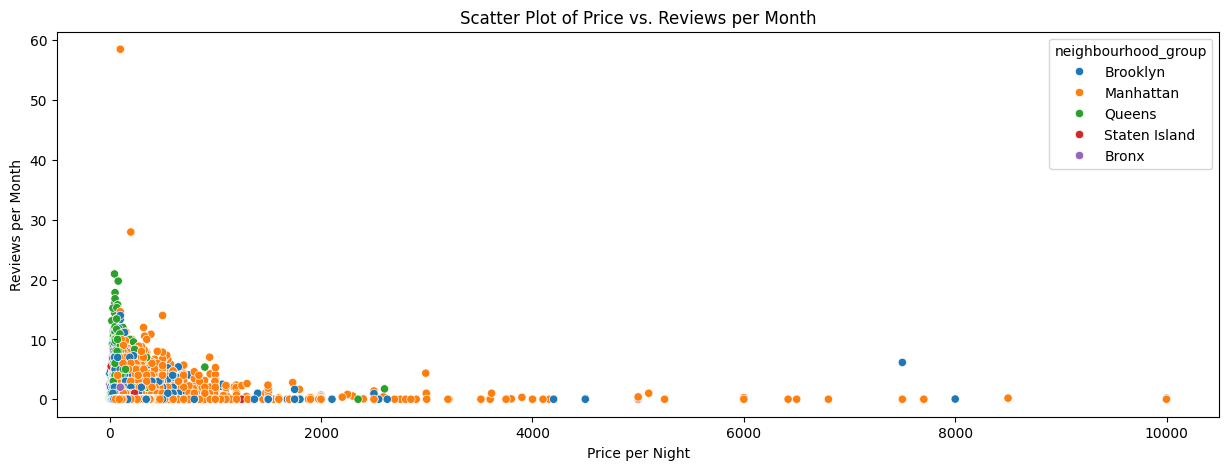

In [16]:
# Chart - 13 visualization code

plt.figure(figsize=(15,5))
sns.scatterplot(x='price', y='reviews_per_month', data=df,hue='neighbourhood_group')
plt.xlabel('Price per Night')
plt.ylabel('Reviews per Month')
plt.title('Scatter Plot of Price vs. Reviews per Month')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Scatter plots reveal whether two variables move together (positive correlation) or in opposite directions (negative correlation).

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Most data points cluster at the lower end of both axes, indicating that many accommodations have low prices and receive a low number of reviews per month.
There are a few outliers, especially in Brooklyn and Manhattan, where some accommodations have high prices but still receive a relatively low number of reviews.No accommodation exceeds 20 reviews per month in this dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Accommodations in Brooklyn and Manhattan may need to reconsider their pricing strategies to attract more reviews.
Staten Island and the Bronx seem to have a more balanced distribution of prices and reviews.

#### Chart - 14 - Correlation Heatmap

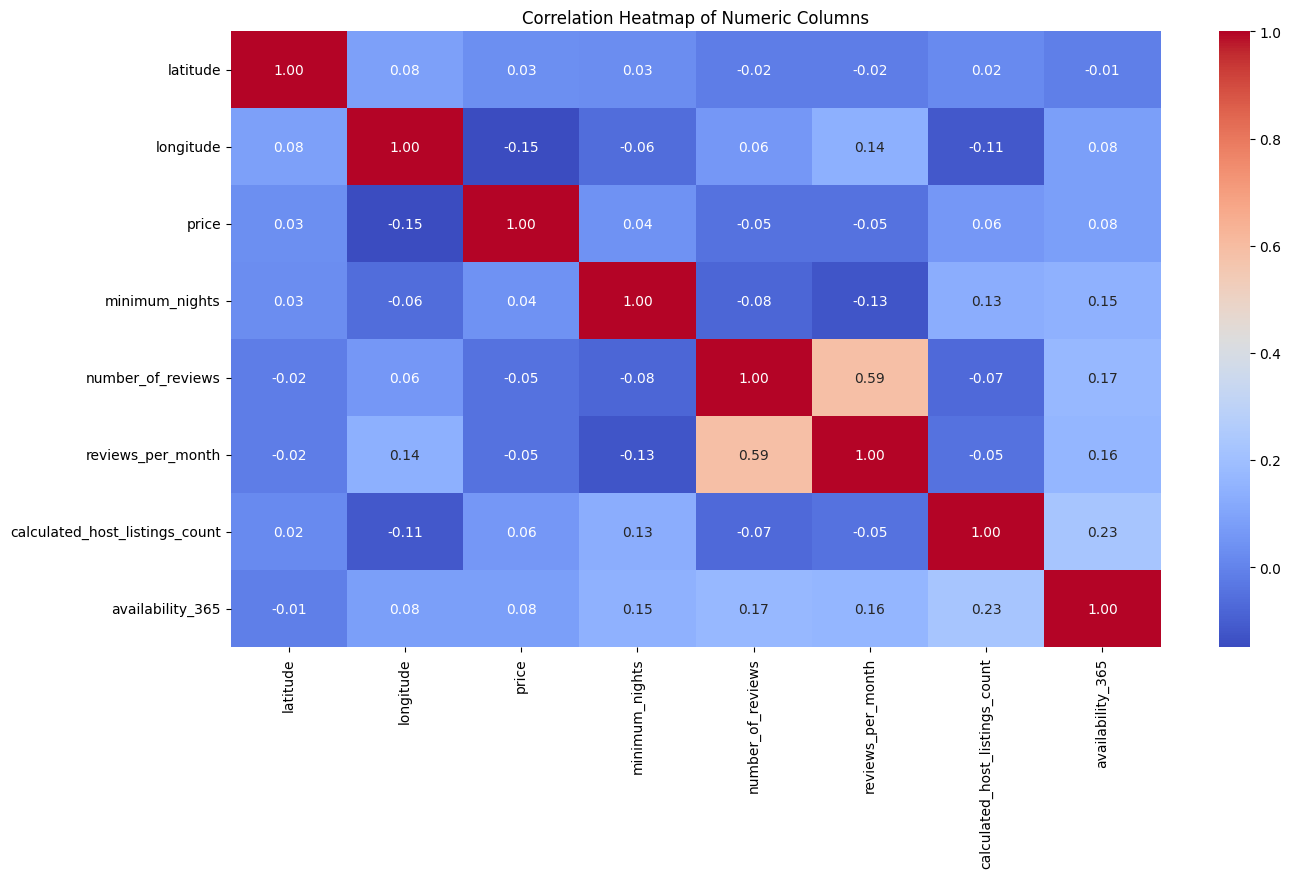

In [18]:
# Correlation Heatmap visualization code

numeric_columns = ['latitude', 'longitude', 'price', 'minimum_nights',
                   'number_of_reviews', 'reviews_per_month',
                   'calculated_host_listings_count', 'availability_365']

# Create a correlation matrix
corr_matrix = df[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

**To explore the correlation between numerical variables.**

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Price does not exhibit strong correlations with other variables. However, hosts can use this information to fine-tune pricing based on other factors (e.g., location, amenities, seasonality).

#### Chart - 15 - Pair Plot

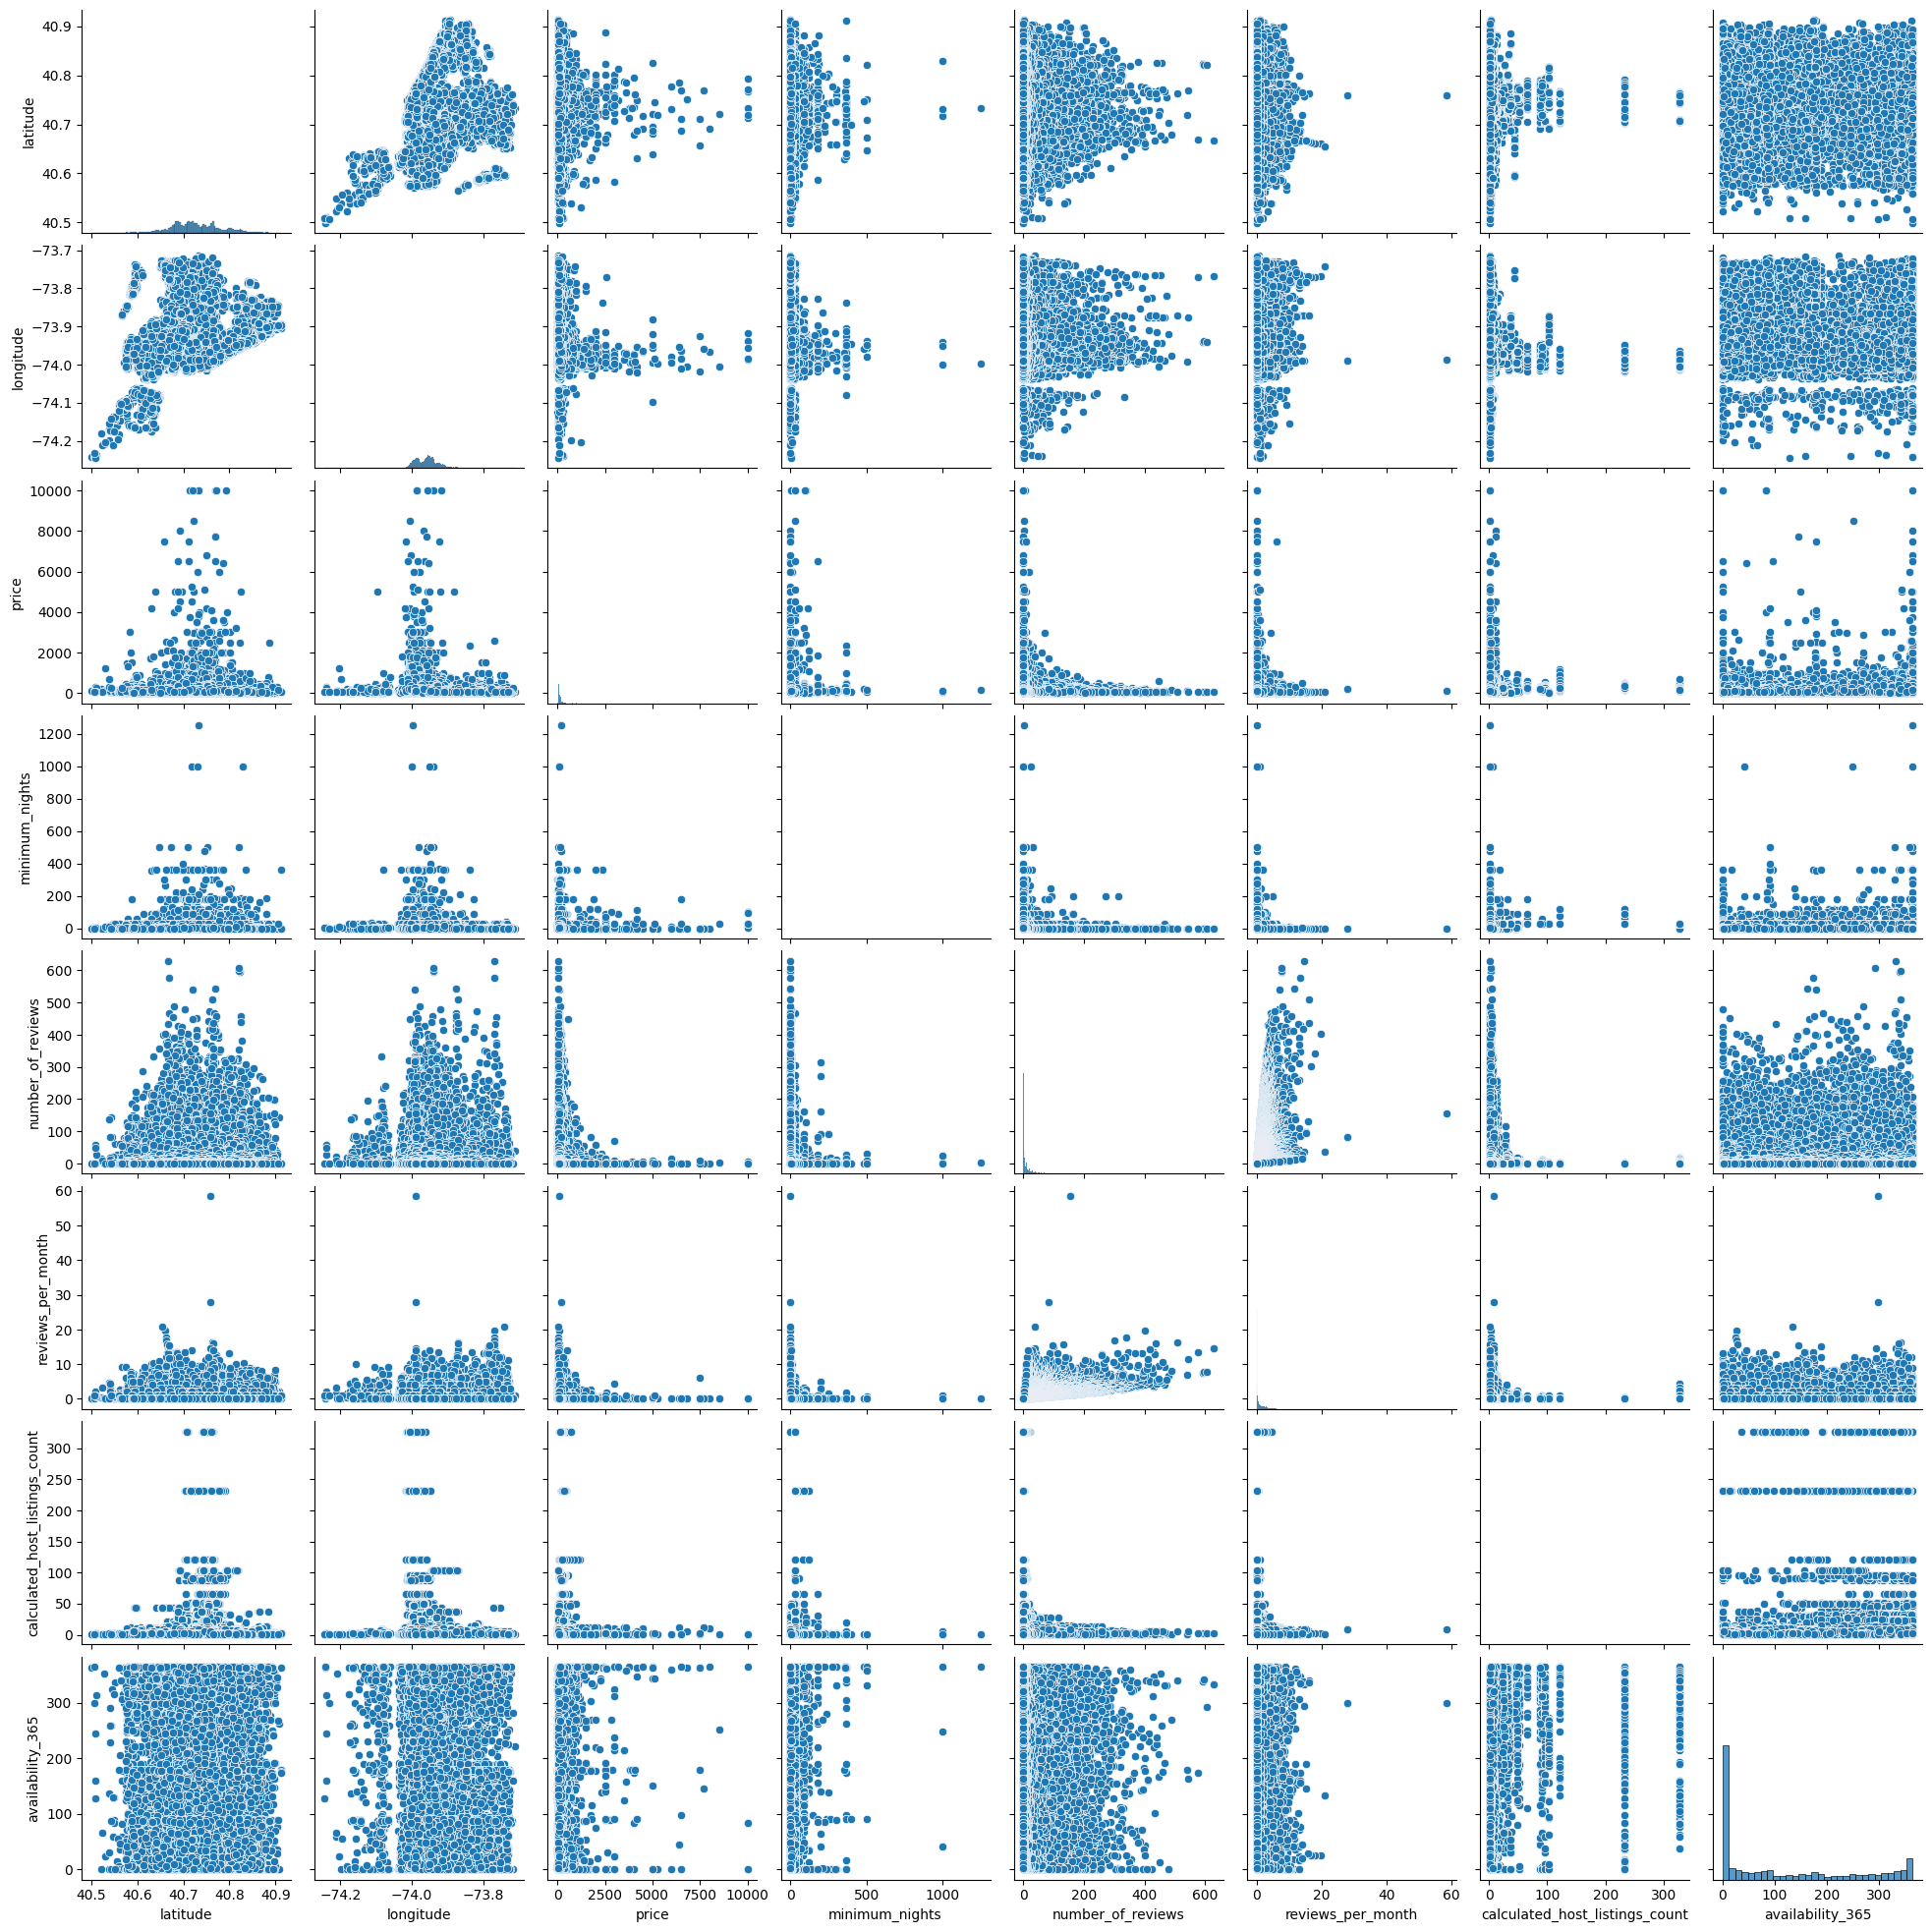

In [19]:
# Pair Plot visualization code

# Pair Plot visualization code
numeric_columns = ['latitude', 'longitude', 'price', 'minimum_nights',
                   'number_of_reviews', 'reviews_per_month',
                   'calculated_host_listings_count', 'availability_365']

# Create a pairplot
sns.pairplot(df[numeric_columns])

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

pair plot is used to visualize relationships and interactions between multiple numerical variables because it provides a comprehensive view of potential correlations and patterns within the data.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The pair plot suggests most variables are independent with no strong linear correlation, but it highlights a potential link between "number of reviews" and "reviews per month," implying more monthly reviews may result in a higher total number of reviews.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***